# Task 1
**Performed by: Kushakov Evgenii, J4132C**

In [1]:
#Import tools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

## Exercise 1
Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:

- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

Refer to ‘Random_Forrest.ipynb’ and ‘Decision_Trees.ipynb’ notebooks for examples. Split the data to train and test as 75%/25%.

In [2]:
#Read CSV-file
bioresponse_df = pd.read_csv('bioresponse.csv')

display(bioresponse_df.head())

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Set train and test data
bioresponse_data = bioresponse_df.drop('Activity', axis = 1)
bioresponse_target = bioresponse_df['Activity']
X_train, X_test, y_train, y_test = train_test_split(bioresponse_data, bioresponse_target, test_size = 0.25, random_state = 1)

### Decision Trees

In [4]:
#Small decision tree
sdt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
sdt.fit(X_train, y_train)
# Labels prediction
sdt_y_pred = sdt.predict(X_test)
# Probabilities for the objects in the test sample
sdt_y_out_proba = sdt.predict_proba(X_test)

In [5]:
#Deep decision tree
ddt = DecisionTreeClassifier(max_depth = 10, random_state = 1)
ddt.fit(X_train, y_train)
# Labels prediction
ddt_y_pred = ddt.predict(X_test)
# Probabilities for the objects in the test sample
ddt_y_out_proba = ddt.predict_proba(X_test)

### Random forests

In [6]:
#Random forest on small trees
rfst = RandomForestClassifier(max_depth = 3, random_state = 1)
rfst.fit(X_train, y_train)
# Labels prediction
rfst_y_pred = rfst.predict(X_test)
# Probabilities for the objects in the test sample
rfst_y_out_proba = rfst.predict_proba(X_test)

In [7]:
#Random forest on deep trees
rfdt = RandomForestClassifier(max_depth = 10, random_state = 1)
rfdt.fit(X_train, y_train)
# Labels prediction
rfdt_y_pred = rfdt.predict(X_test)
# Probabilities for the objects in the test sample
rfdt_y_out_proba = rfdt.predict_proba(X_test)

## Exercise 2
Calculate the following metrics to check the quality of your models:

- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

### Decision Trees

In [8]:
#Small decision tree
sdt_precision = precision_score(y_test, sdt_y_pred)
sdt_recall = recall_score(y_test, sdt_y_pred)
sdt_accuracy = accuracy_score(y_test, sdt_y_pred)
sdt_f1_score = f1_score(y_test, sdt_y_pred)
sdt_log_loss = log_loss(y_test, sdt_y_pred)

print('\nFor small decision tree:\n')
print(f'Precision - {sdt_precision}')
print(f'Recall - {sdt_recall}')
print(f'Accuracy - {sdt_accuracy}')
print(f'F1-score - {sdt_f1_score}')
print(f'Log-loss - {sdt_log_loss}')


For small decision tree:

Precision - 0.7755474452554745
Recall - 0.8252427184466019
Accuracy - 0.7729211087420043
F1-score - 0.7996237064910631
Log-loss - 8.184752848488223


In [9]:
#Deep decision tree
ddt_precision = precision_score(y_test, ddt_y_pred)
ddt_recall = recall_score(y_test, ddt_y_pred)
ddt_accuracy = accuracy_score(y_test, ddt_y_pred)
ddt_f1_score = f1_score(y_test, ddt_y_pred)
ddt_log_loss = log_loss(y_test, ddt_y_pred)

print('\nFor deep decision tree:\n')
print(f'Precision - {ddt_precision}')
print(f'Recall - {ddt_recall}')
print(f'Accuracy - {ddt_accuracy}')
print(f'F1-score - {ddt_f1_score}')
print(f'Log-loss - {ddt_log_loss}')


For deep decision tree:

Precision - 0.7894736842105263
Recall - 0.7572815533980582
Accuracy - 0.755863539445629
F1-score - 0.7730426164519326
Log-loss - 8.79956996386762


### Random forests

In [10]:
#Random forest on small trees
rfst_precision = precision_score(y_test, rfst_y_pred)
rfst_recall = recall_score(y_test, rfst_y_pred)
rfst_accuracy = accuracy_score(y_test, rfst_y_pred)
rfst_f1_score = f1_score(y_test, rfst_y_pred)
rfst_log_loss = log_loss(y_test, rfst_y_pred)

print('\nFor random forest on small trees:\n')
print(f'Precision - {rfst_precision}')
print(f'Recall - {rfst_recall}')
print(f'Accuracy - {rfst_accuracy}')
print(f'F1-score - {rfst_f1_score}')
print(f'Log-loss - {rfst_log_loss}')


For random forest on small trees:

Precision - 0.7261029411764706
Recall - 0.7669902912621359
Accuracy - 0.7132196162046909
F1-score - 0.7459867799811142
Log-loss - 10.336612752316114


In [11]:
#Random forest on deep trees
rfdt_precision = precision_score(y_test, rfdt_y_pred)
rfdt_recall = recall_score(y_test, rfdt_y_pred)
rfdt_accuracy = accuracy_score(y_test, rfdt_y_pred)
rfdt_f1_score = f1_score(y_test, rfdt_y_pred)
rfdt_log_loss = log_loss(y_test, rfdt_y_pred)

print('\nFor random forest on deep trees:\n')
print(f'Precision - {rfdt_precision}')
print(f'Recall - {rfdt_recall}')
print(f'Accuracy - {rfdt_accuracy}')
print(f'F1-score - {rfdt_f1_score}')
print(f'Log-loss - {rfdt_log_loss}')


For random forest on deep trees:

Precision - 0.8096192384769539
Recall - 0.7844660194174757
Accuracy - 0.7803837953091685
F1-score - 0.7968441814595661
Log-loss - 7.915770360509736


## Exercise 3
Plot precision-recall and ROC curves for your models.

### Decision Trees

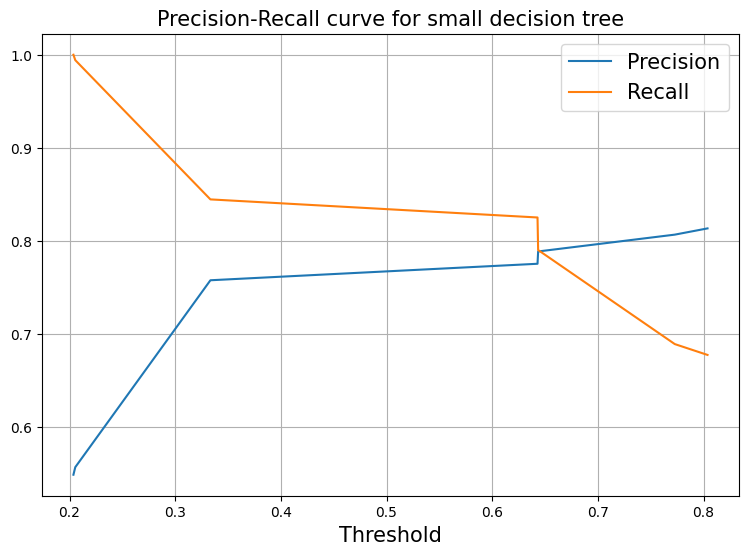

In [12]:
#Small decision tree
#Precision-recall curve
sdt_precision, sdt_recall, thresholds = precision_recall_curve(y_test, sdt_y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresholds, sdt_precision[:-1], label="Precision")
plt.plot(thresholds, sdt_recall[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for small decision tree',fontsize = 15)
plt.legend(fontsize = 15)

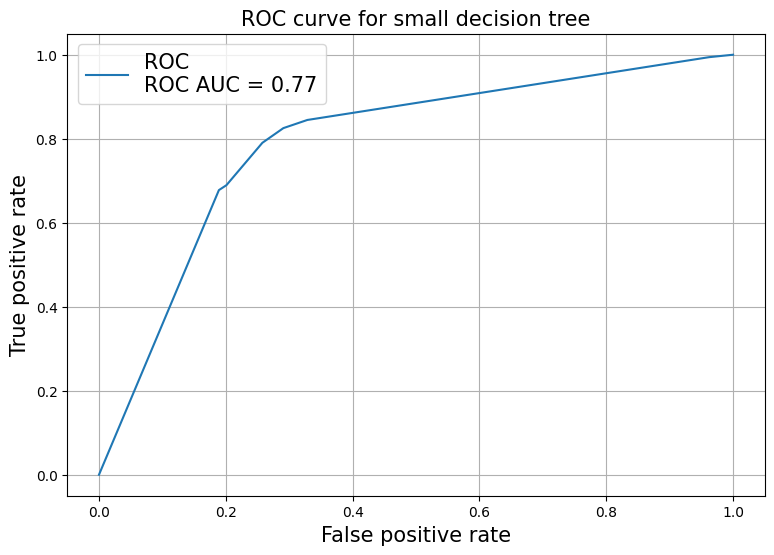

In [13]:
#Small decision tree
# ROC-curve
sdt_roc_auc = roc_auc_score(sdt_y_pred, y_test)
fpr, tpr, thr = roc_curve(y_test, sdt_y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(sdt_roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve for small decision tree",fontsize = 15)
plt.legend(fontsize = 15)

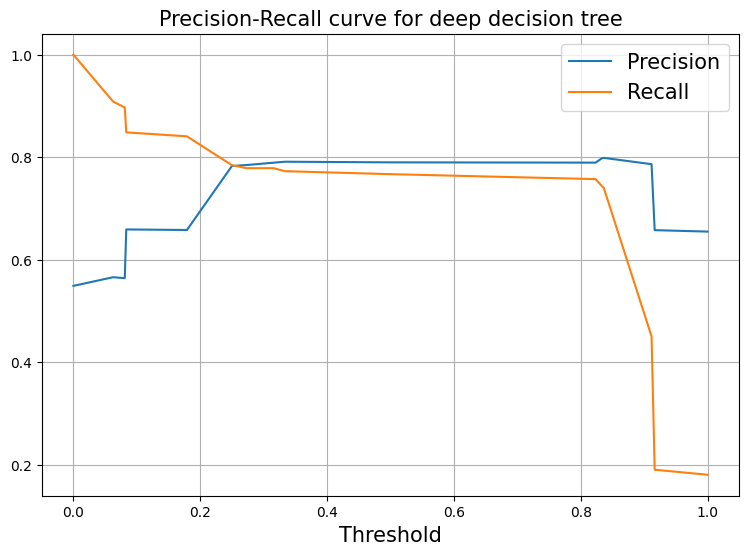

In [14]:
#Deep decision tree
#Precision-recall curve
ddt_precision, ddt_recall, thresholds = precision_recall_curve(y_test, ddt_y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresholds, ddt_precision[:-1], label="Precision")
plt.plot(thresholds, ddt_recall[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for deep decision tree',fontsize = 15)
plt.legend(fontsize = 15)

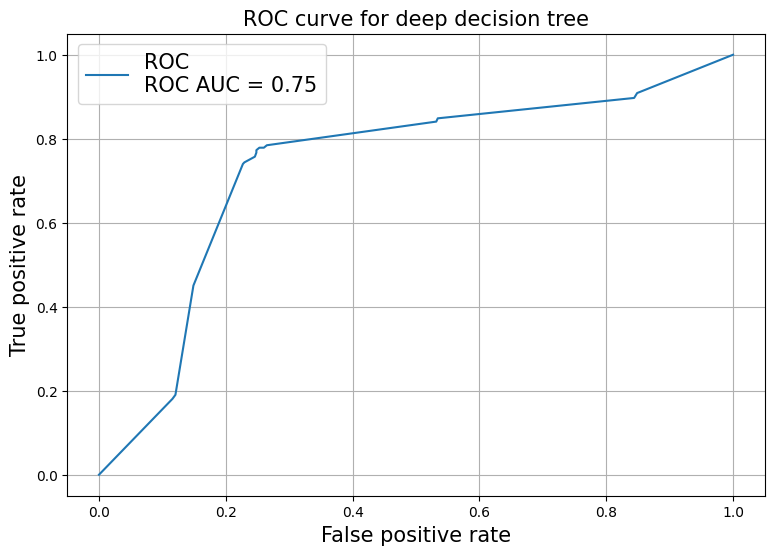

In [15]:
#Deep decision tree
# ROC-curve
ddt_roc_auc = roc_auc_score(ddt_y_pred, y_test)
fpr, tpr, thr = roc_curve(y_test, ddt_y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(ddt_roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve for deep decision tree",fontsize = 15)
plt.legend(fontsize = 15)

### Random forests

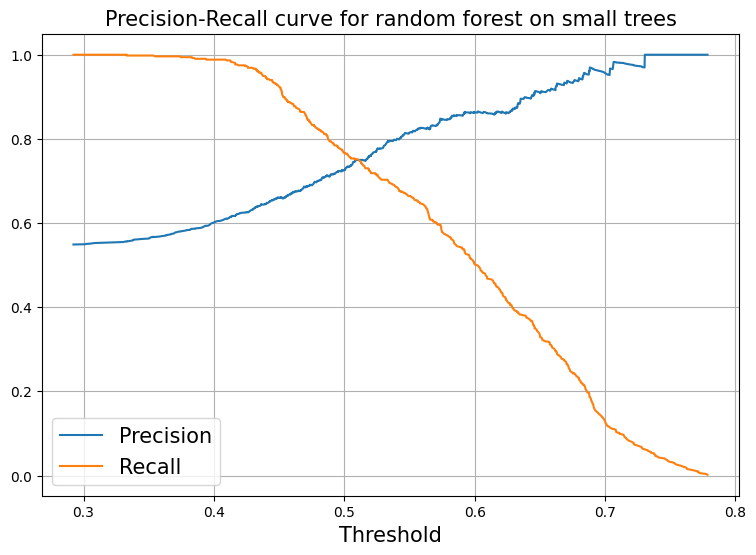

In [16]:
#Random forest on small trees
#Precision-recall curve
rfst_precision, rfst_recall, thresholds = precision_recall_curve(y_test, rfst_y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresholds, rfst_precision[:-1], label="Precision")
plt.plot(thresholds, rfst_recall[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for random forest on small trees',fontsize = 15)
plt.legend(fontsize = 15)

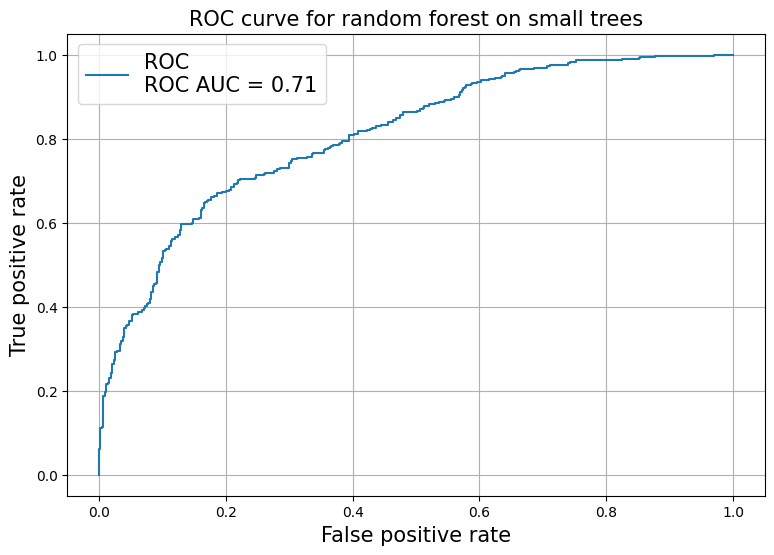

In [17]:
#Random forest on small trees
# ROC-curve
rfst_roc_auc = roc_auc_score(rfst_y_pred, y_test)
fpr, tpr, thr = roc_curve(y_test, rfst_y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(rfst_roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve for random forest on small trees",fontsize = 15)
plt.legend(fontsize = 15)

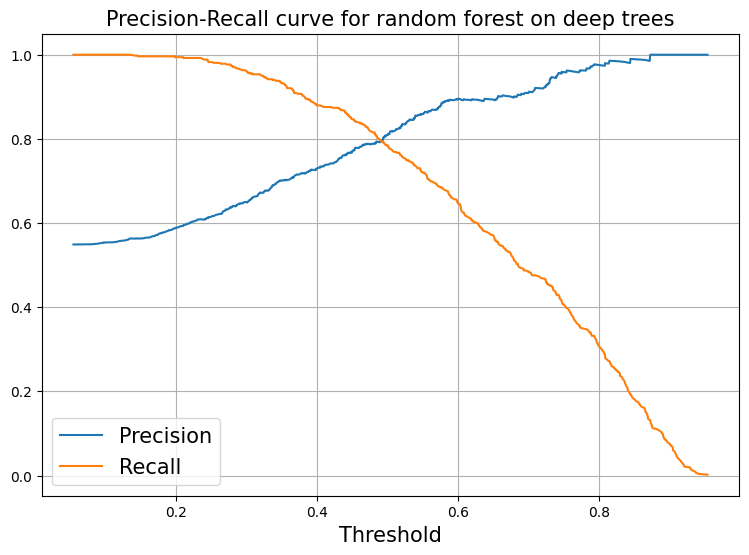

In [18]:
#Random forest on deep trees
#Precision-recall curve
rfdt_precision, rfdt_recall, thresholds = precision_recall_curve(y_test, rfdt_y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresholds, rfdt_precision[:-1], label="Precision")
plt.plot(thresholds, rfdt_recall[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve for random forest on deep trees',fontsize = 15)
plt.legend(fontsize = 15)

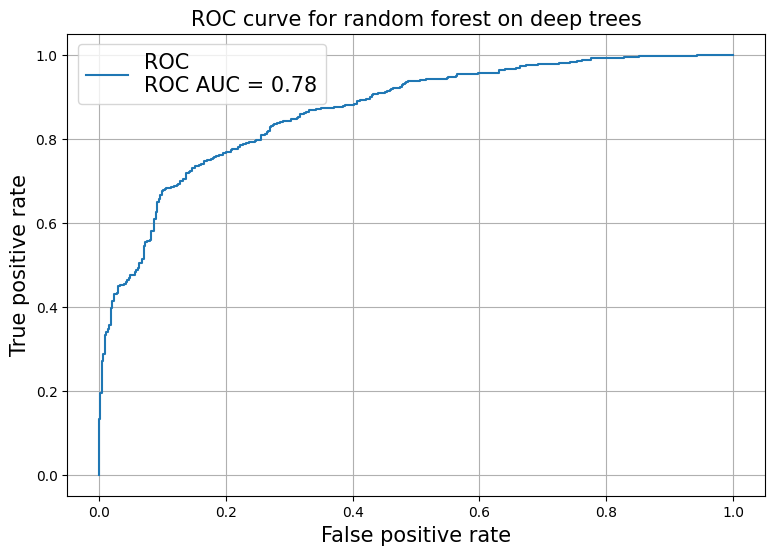

In [19]:
#Random forest on deep trees
# ROC-curve
rfdt_roc_auc = roc_auc_score(rfdt_y_pred, y_test)
fpr, tpr, thr = roc_curve(y_test, rfdt_y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(rfdt_roc_auc,2)))
plt.grid()
plt.xlabel("False positive rate",fontsize = 15)
plt.ylabel("True positive rate",fontsize = 15)
plt.title(u"ROC curve for random forest on deep trees",fontsize = 15)
plt.legend(fontsize = 15)

## Exercise 4
Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.

In [24]:
#New classifier
cls = RandomForestClassifier(n_estimators = 38, max_depth = 2, min_samples_split = 1700, random_state = 1)
cls.fit(X_train, y_train)
cls_y_pred = cls.predict(X_test)
cls_y_pred_prob = cls.predict_proba(X_test)[:, 1]

print('\nConfusion matrix:\n')
print(confusion_matrix(y_test, cls_y_pred))

cls_precision = precision_score(y_test, cls_y_pred)
cls_recall = recall_score(y_test, cls_y_pred)
cls_accuracy = accuracy_score(y_test, cls_y_pred)
cls_f1_score = f1_score(y_test, cls_y_pred)
cls_log_loss = log_loss(y_test, cls_y_pred)

print('\nFor new classifier:\n')
print(f'Precision - {cls_precision}')
print(f'Recall - {cls_recall}')
print(f'Accuracy - {cls_accuracy}')
print(f'F1-score - {cls_f1_score}')
print(f'Log-loss - {cls_log_loss}')


Confusion matrix:

[[112 311]
 [ 25 490]]

For new classifier:

Precision - 0.6117353308364545
Recall - 0.9514563106796117
Accuracy - 0.6417910447761194
F1-score - 0.7446808510638299
Log-loss - 12.911159422967335
